In [ ]:
! python -m pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 26.5 MB/s 
     |████████████████████████████████| 178 kB 42.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.3 MB/s 
     |████████████████████████████████| 67 kB 2.5 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 138 kB 44.3 MB/s 
     |████████████████████████████████| 596 kB 68.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.14-py3-none-any.whl size=24837 sha256=503e4abb5d6d8461d68e8ede250896ab0ab0533edc9262b34ee33423996547bd
  Stored in directory: /root/.cache/pip/wheels/c7/84/36/a6a32c749ead923690d15d20443fb53fa2fe10beaa408f371b
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=27d87d126fcae437b90059453f80b1ac9a144e201c7ddfcdf827db4c10c099af
  Stored in directory: /root/.cache/pi

# Getting the model from roboflow

In [ ]:
from roboflow import Roboflow
def get_model():
    rf = Roboflow(api_key="0wMG8oYYDLSEz3JIppU5")
    project = rf.workspace().project("surgical-tools-bj0au")
    version = project.version(1)
    model = version.model
    return model


model = get_model()


loading Roboflow workspace...
loading Roboflow project...


# Preprocessing for images

In [ ]:
import scipy
from scipy import ndimage
import numpy as np


def preprocess(im):
    k_1 = 0.25
    k_2 = 0.25

    h,w,_ = im.shape

    x,y = np.meshgrid(np.float32(np.arange(w)),np.float32(np.arange(h)))
    x_c = w/2 
    y_c = h/2 
    x = x - x_c
    y = y - y_c
    x = x/x_c
    y = y/y_c

    radius = np.sqrt(x**2 + y**2) 

    m_r = 1 + k_1*radius + k_2*radius**2 

    x= x * m_r 
    y = y * m_r

    x= x*x_c + x_c
    y = y*y_c + y_c
    distorted_r = ndimage.map_coordinates(im[:, :, 0], [y.ravel(),x.ravel()])
    distorted_g = ndimage.map_coordinates(im[:, :, 1], [y.ravel(),x.ravel()])
    distorted_b = ndimage.map_coordinates(im[:, :, 2], [y.ravel(),x.ravel()])
    distorted = np.dstack([distorted_r, distorted_g, distorted_b])
    distorted.resize(im.shape)
    return distorted

In [ ]:
import cv2
files = ['/content/surgical_tools1.jpg', '/content/surgical_tools2.jpg', '/content/surgical_tools3.jpg']
imgs = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB) for file in files]


Original images are shown here

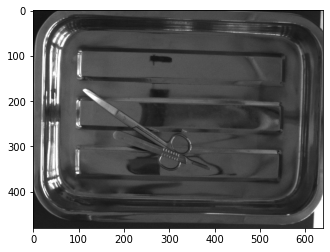

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(imgs[0])

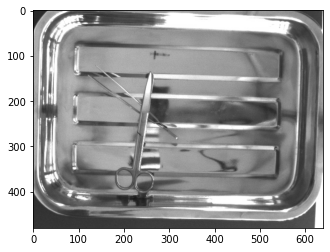

In [ ]:
plt.imshow(imgs[1])

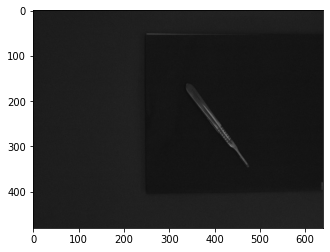

In [ ]:
plt.imshow(imgs[2])

Distorted images

In [ ]:
distorted_imgs = [preprocess(img) for img in imgs]

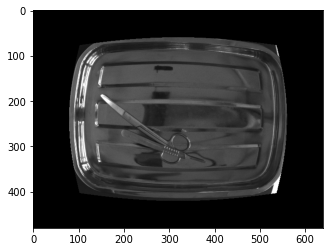

In [ ]:
plt.imshow(distorted_imgs[0])

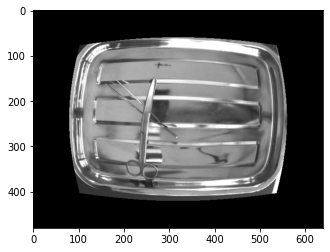

In [ ]:
plt.imshow(distorted_imgs[1])

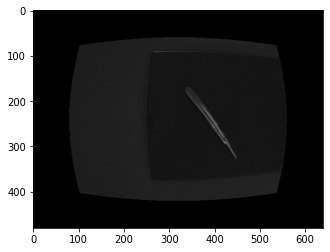

In [ ]:
plt.imshow(distorted_imgs[2])

In [ ]:
from PIL import Image 
import PIL 

for i, img in enumerate(distorted_imgs):
  img = Image.fromarray(img)
  img.save(f'surgical_tools_{i}.png')

# Apply modle to images

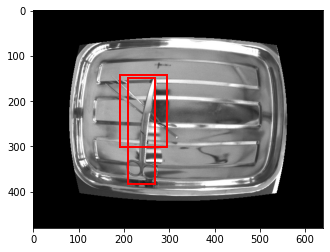

In [ ]:
model.predict('surgical_tools_1.png').plot(stroke=2)

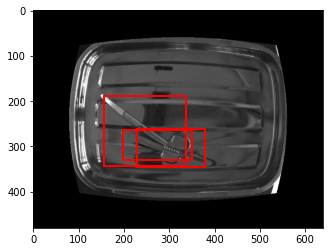

In [ ]:
model.predict('surgical_tools_0.png').plot(stroke=2)

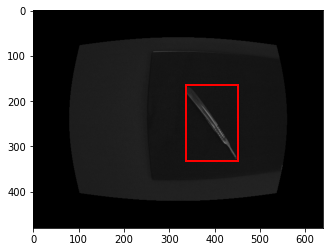

In [ ]:
model.predict('surgical_tools_2.png').plot(stroke=2)

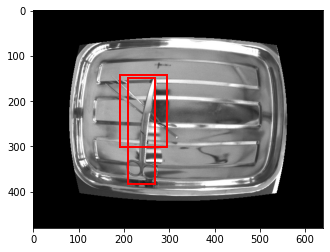

In [ ]:
model.predict('surgical_tools_1.png').plot(stroke=2)